In [25]:
import pandas as pd#to read the csv file
import numpy as np #NumPy is used for working with arrays.
import matplotlib.pyplot as plt

In [26]:
dataframe=pd.read_csv('/content/collegePlace.csv')

In [27]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1
1,21,Female,Computer Science,0,7,1,1
2,22,Female,Information Technology,1,6,0,1
3,21,Male,Information Technology,0,8,1,1
4,22,Male,Mechanical,0,8,0,1


In [28]:
dataframe.shape

(2966, 7)

In [29]:
dataframe['Gender'].replace({'Male':'1','Female':'0'},inplace=True)

In [30]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1
1,21,0,Computer Science,0,7,1,1
2,22,0,Information Technology,1,6,0,1
3,21,1,Information Technology,0,8,1,1
4,22,1,Mechanical,0,8,0,1


In [31]:
dataframe['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [32]:
dataframe['Stream'].replace({'Electronics And Communication':'0','Computer Science':'1','Information Technology':'2','Mechanical':'3','Electrical':'4','Civil':'5'},inplace=True)

In [33]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8,1,1
1,21,0,1,0,7,1,1
2,22,0,2,1,6,0,1
3,21,1,2,0,8,1,1
4,22,1,3,0,8,0,1


In [34]:
dataframe.isnull().sum() # checking null values

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

<ipython-input-35-ab9758572906>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr())


<Axes: >

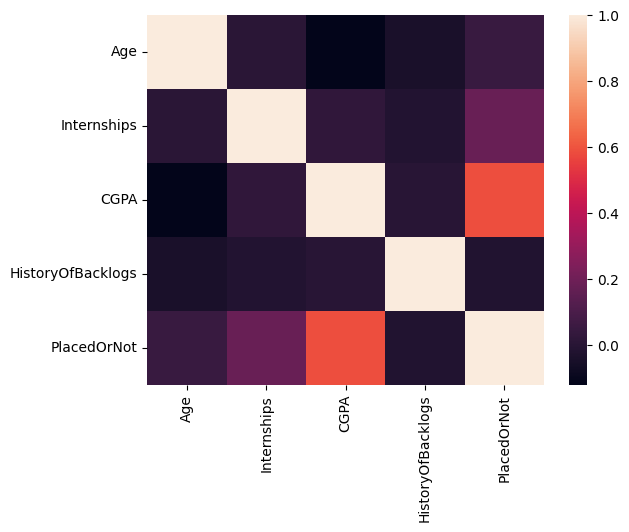

In [35]:
import seaborn as sns
sns.heatmap(dataframe.corr())

In [36]:
Y=dataframe['PlacedOrNot']
X=dataframe.drop(['PlacedOrNot'],axis=1)

In [37]:
X

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,1,0,1,8,1
1,21,0,1,0,7,1
2,22,0,2,1,6,0
3,21,1,2,0,8,1
4,22,1,3,0,8,0
...,...,...,...,...,...,...
2961,23,1,2,0,7,0
2962,23,1,3,1,7,0
2963,22,1,2,1,7,0
2964,22,1,1,1,7,0


### train_test_split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(2966, 6) (2669, 6) (297, 6)


In [40]:
print(Y.shape, Y_train.shape, Y_test.shape)

(2966,) (2669,) (297,)


### Knn regression

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
scaler.fit(X)

MinMaxScaler()

In [46]:
X = scaler.transform(X)
X

array([[0.27272727, 1.        , 0.        , 0.33333333, 0.75      ,
        1.        ],
       [0.18181818, 0.        , 0.2       , 0.        , 0.5       ,
        1.        ],
       [0.27272727, 0.        , 0.4       , 0.33333333, 0.25      ,
        0.        ],
       ...,
       [0.27272727, 1.        , 0.4       , 0.33333333, 0.5       ,
        0.        ],
       [0.27272727, 1.        , 0.2       , 0.33333333, 0.5       ,
        0.        ],
       [0.36363636, 1.        , 1.        , 0.        , 0.75      ,
        0.        ]])

In [47]:
acc = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)
    acc.append(ac)

maximum acc =0.8754208754208754 at k = 13


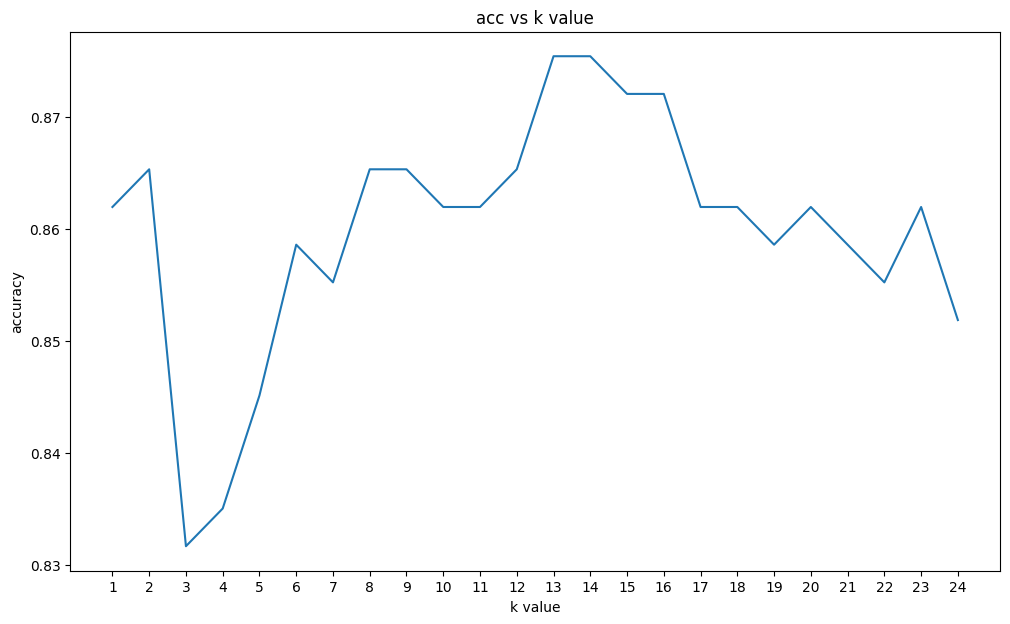

In [48]:
plt.figure(figsize = (12, 7))
plt.plot(range(1, 25),  acc)
plt.title("acc vs k value")
plt.xlabel("k value")
plt.xticks(range(1, 25))
plt.ylabel("accuracy")
print(f"maximum acc ={max(acc)} at k = {np.array(acc).argmax() + 1}")
plt.show()

In [49]:
Knn = KNeighborsClassifier(n_neighbors=24, metric = "euclidean")
Knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=24)

In [50]:
Y_pred = Knn.predict(X_test)
Y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [51]:
Y_test

1390    1
2644    1
422     0
657     0
1869    0
       ..
1724    0
2689    0
39      1
1981    1
718     1
Name: PlacedOrNot, Length: 297, dtype: int64

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[119,  10],
       [ 34, 134]])

In [53]:
accuracy_KNN=accuracy_score(Y_test, Y_pred)

In [54]:
accuracy_KNN

0.8518518518518519

In [55]:
#CONFUSION MATRIX
tp = cm[1][1]
tn = cm[0][0]
fp = cm[1][0]
fn = cm[0][1]

In [56]:
from sklearn.metrics import precision_score
precision_score(Y_test, Y_pred)

0.9305555555555556

In [57]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred )
print(f1)

0.858974358974359


## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [59]:
Y_pred = dtree.predict(X_test)
Y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [60]:
Y_test

1390    1
2644    1
422     0
657     0
1869    0
       ..
1724    0
2689    0
39      1
1981    1
718     1
Name: PlacedOrNot, Length: 297, dtype: int64

In [61]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[119,  10],
       [ 25, 143]])

In [62]:
accuracy_Decision_Tree=accuracy_score(Y_test, Y_pred)

In [63]:
accuracy_Decision_Tree

0.8821548821548821

In [64]:
f2 = f1_score(Y_test, Y_pred )
print(f2)

0.8909657320872275


In [65]:
#CONFUSION MATRIX
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

In [66]:
precision_score(Y_test, Y_pred)

0.934640522875817

## Random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier(n_estimators = 50, max_depth=2, random_state=0)

In [69]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0)

In [70]:
Y_pred = Knn.predict(X_test)

In [71]:
accuracy_Random_forest=accuracy_score(Y_test, Y_pred)

In [72]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[119,  10],
       [ 34, 134]])

In [73]:
accuracy_Random_forest

0.8518518518518519

In [74]:
#F1_score
f4 = f1_score(Y_test, Y_pred )
print(f1)

0.858974358974359


In [75]:
#CONFUSION MATRIX
TP = cm[0][0]#TRUE POSITIE
FP = cm[0][1]#FALSE POSITIVE
FN = cm[1][0]#FALSE NEGATIVE
TN = cm[1][1]#TRUE NEGATIVE

In [76]:
precision_score(Y_test, Y_pred)

0.9305555555555556

## navie byes

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [80]:
Y_pred  =  classifier.predict(X_test)
Y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [81]:
Y_test

1390    1
2644    1
422     0
657     0
1869    0
       ..
1724    0
2689    0
39      1
1981    1
718     1
Name: PlacedOrNot, Length: 297, dtype: int64

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test,Y_pred)
cm

array([[103,  26],
       [ 35, 133]])

In [83]:
ac

0.7946127946127947

## COMPARISION

In [84]:
algorithms=['KNN regression','Decision Tree','Random forest ','GaussianNB']
scores=[accuracy_KNN,accuracy_Decision_Tree,accuracy_Random_forest,ac]

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

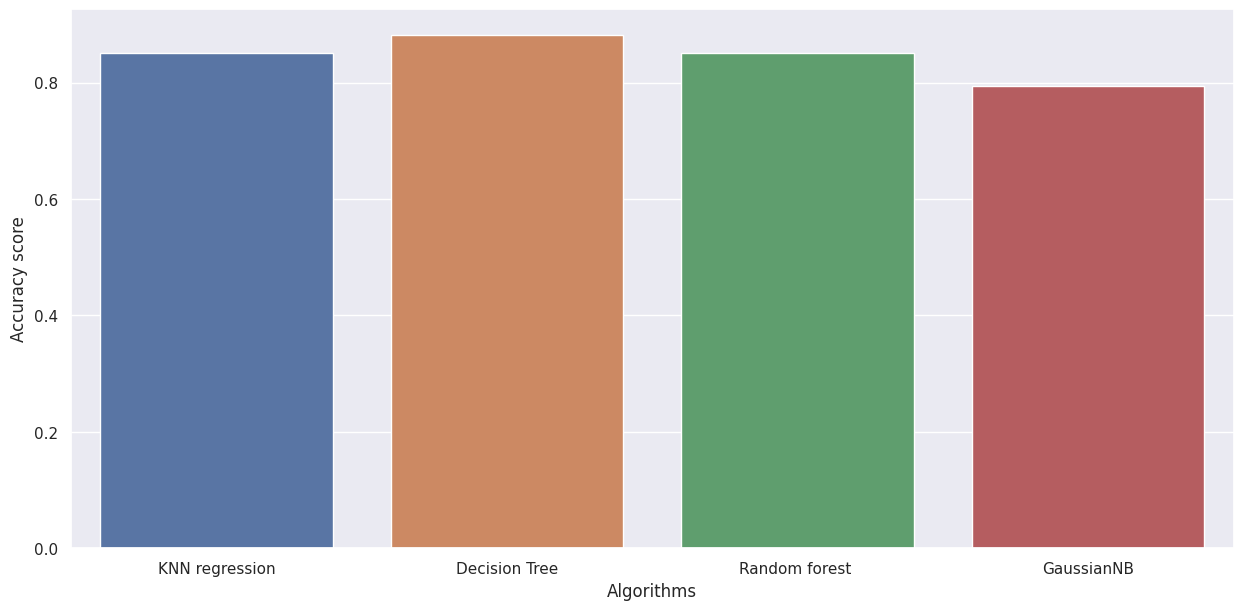

In [87]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x = algorithms,y = scores)

In [88]:
import joblib
joblib.dump(dtree, "model.pkl")
model = joblib.load('model.pkl' )
model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])